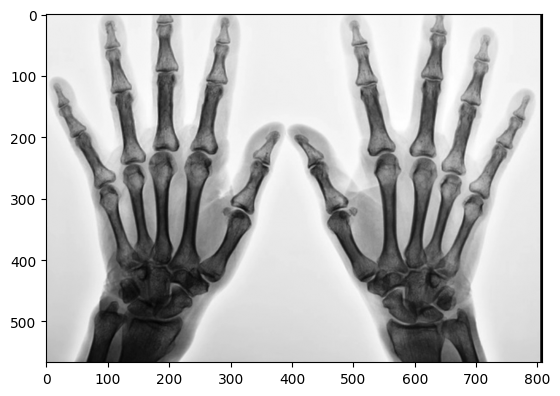

In [ ]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# open a grayscale image
img = Image.open('X.png').convert('L')

# convert image 1 into an ndarray
im_1 = np.asarray(img)

# inversion operation
im_2 = 255 - im_1

# convert image 2 from ndarray to image
new_img = Image.fromarray(im_2)


plt.imshow(new_img, cmap='gray')
plt.show()


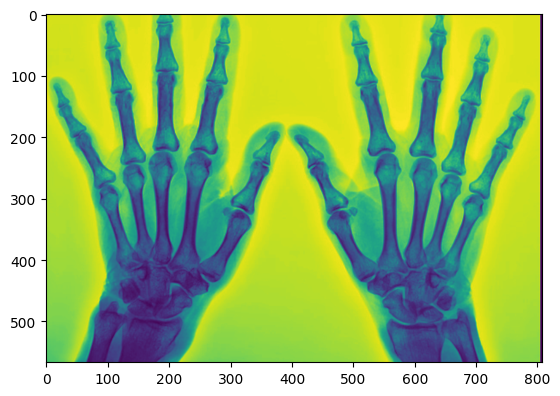

In [2]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

#open a grayscale image
img = Image.open('X.png').convert('L')

#convert image 1 into an ndarray
im_1 = np.asarray(img)

#inversion operation
im_2 = 255 - im_1

#convert image 2 from ndarray to image
new_img = Image.fromarray(im_2)

img.show()

plt.imshow(new_img)
plt.show()


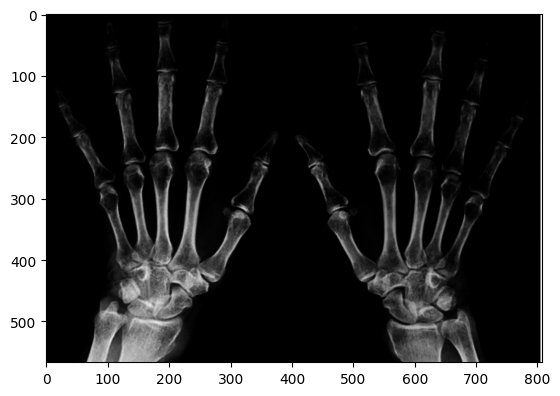

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pylab as plt

# open a grayscale image
img = Image.open('X.png').convert('L')

# convert image 1 into an ndarray
im_l = np.asarray(img)

# init gamma
gamma = 5
# gamma = 0.5

# convert ndarray from int to float
b1 = im_l.astype(float)

# find maximum value in b1
b2 = np.max(b1)

# b3 is normalized
b3 = b1 / b2

# b2 gamma correction exponent is computed
b2 = np.log(b3 + 1e-8) * gamma   # thêm 1e-8 để tránh log(0)

# gamma correction is computed
c = np.exp(b2) * 255.0

# c1 is converted to type uint8
c1 = c.astype(np.uint8)

d = Image.fromarray(c1)

img.show()
d.show()
plt.imshow(d, cmap='gray')
plt.show()


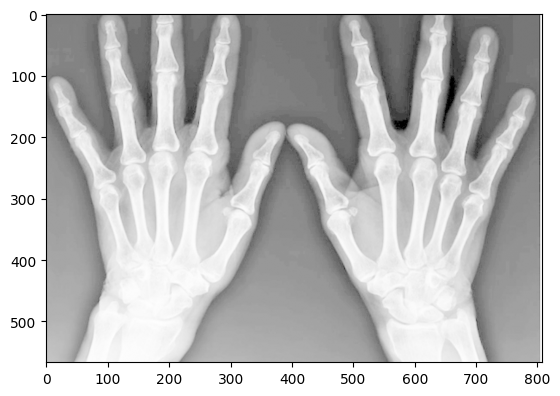

In [11]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# open a grayscale image
img = Image.open('X.png').convert('L')

# convert image 1 into an ndarray
im_l = np.asarray(img)

# convert ndarray from int to float
b1 = im_l.astype(float)

# find maximum value in b1
b2 = np.max(b1)

# performing the log transformation
c = (128.0 * np.log(1 + b1)) / np.log(1 + b2)

# c1 is converted to type int
c1 = c.astype(np.uint8)

d = Image.fromarray(c1)

img.show()
d.show()
plt.imshow(d, cmap='gray')
plt.show()


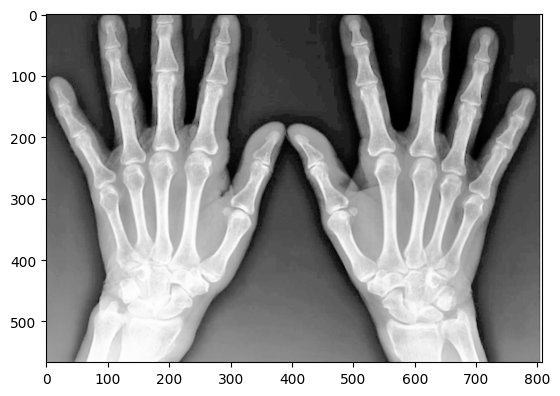

In [12]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# open a grayscale image
img = Image.open('X.png').convert('L')

# convert image 1 into an ndarray
im1 = np.asarray(img)

# convert 2D ndarray to 1D array
b1 = im1.flatten()

# histogram and bin are computed
hist, bins = np.histogram(im1, 256, [0, 255])

# cumulative distribution function is computed
cdf = hist.cumsum()

# places where cdf=0 is masked or ignored
# rest is stored in cdf_m
cdf_m = np.ma.masked_equal(cdf, 0)

# histogram equalization is performed
num_cdf_m = (cdf_m - cdf_m.min()) * 255
den_cdf_m = (cdf_m.max() - cdf_m.min())
cdf_m = num_cdf_m / den_cdf_m

# the masked places in cdf_m are now 0
cdf = np.ma.filled(cdf_m, 0).astype('uint8')

# cdf values are assigned in the flattened array
im2 = cdf[b1]

# im2 is 1D so we use reshape command to make it into 2D
im3 = np.reshape(im2, im1.shape)

# converting im3 to an image
im4 = Image.fromarray(im3)

img.show()
im4.show()
plt.imshow(im4, cmap='gray')
plt.show()


Min: 0 Max: 255


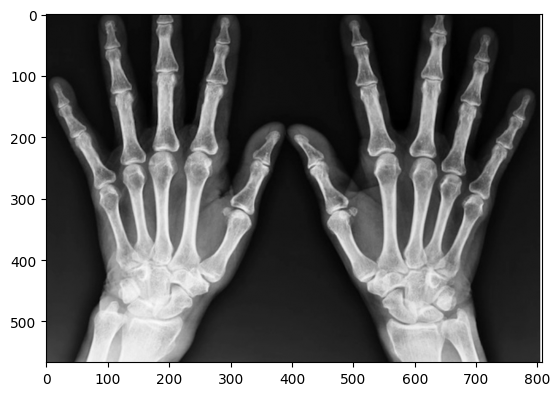

In [13]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

# open a grayscale image
img = Image.open('X.png').convert('L')

# convert image 1 into an ndarray
im1 = np.asarray(img)

# finding the maximum and minimum pixel values
b = im1.max()
a = im1.min()
print("Min:", a, "Max:", b)

# converting im1 to float
c = im1.astype(float)

# contrast stretching transformation
im2 = 255 * (c - a) / (b - a)

# convert to uint8 for image compatibility
im2 = im2.astype(np.uint8)

# im2 is converted from ndarray to image
im3 = Image.fromarray(im2)

img.show()
im3.show()
plt.imshow(im3, cmap='gray')
plt.show()


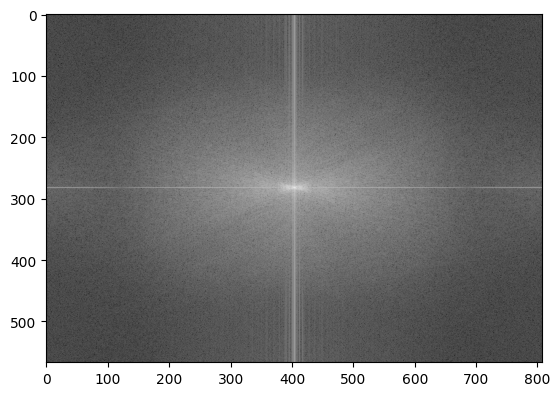

In [15]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
from scipy import fftpack

# open a grayscale image
img = Image.open('X.png').convert('L')

# convert image 1 into an ndarray
im1 = np.asarray(img)

# performing FFT
c = np.abs(fftpack.fft2(im1))

# shifting the Fourier frequency image
d = fftpack.fftshift(c)

# apply log scale for visualization
d = np.log(1 + d)

# normalize to [0, 255]
d = (d / d.max()) * 255

# convert to uint8 for displaying as image
d = d.astype(np.uint8)

# im2 is converted from ndarray to image
im3 = Image.fromarray(d)

img.show()
im3.show()
plt.imshow(im3, cmap='gray')
plt.show()


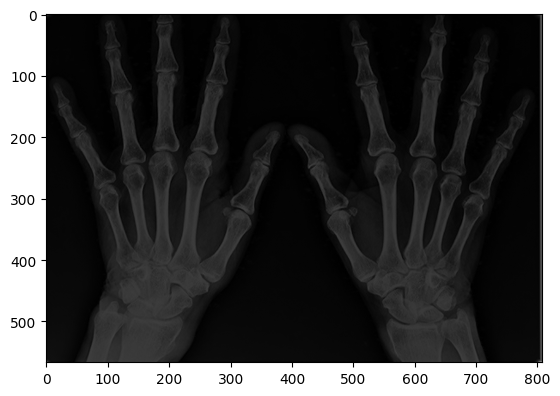

In [17]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
from scipy import fftpack

# open a grayscale image
img = Image.open('X.png').convert('L')

# convert image 1 into an ndarray
im1 = np.asarray(img)

# performing FFT
c = np.abs(fftpack.fft2(im1))

# shifting the Fourier frequency image
d = fftpack.fftshift(c)

# initializing variables for convolution function
M, N = d.shape
H = np.ones((M, N))

center1 = M / 2
center2 = N / 2
d_0 = 30.0  # cut-off radius
tl = 1      # order of Butterworth filter

# defining the convolution function for BLPF
for i in range(M):
    for j in range(N):
        r1 = (i - center1) ** 2 + (j - center2) ** 2
        r = math.sqrt(r1)
        if r > 0:
            H[i, j] = 1 / (1 + (r / d_0) ** (2 * tl))

# performing the convolution (multiply in frequency domain)
con = fftpack.fft2(im1) * H

# computing the magnitude of the inverse FFT
e = np.abs(fftpack.ifft2(con))

# normalize to 0–255 and convert to uint8
e = (e / np.max(e)) * 255
e = e.astype(np.uint8)

# converting to image
im3 = Image.fromarray(e)

# show original and filtered images
img.show()
im3.show()
plt.imshow(im3, cmap='gray')
plt.show()


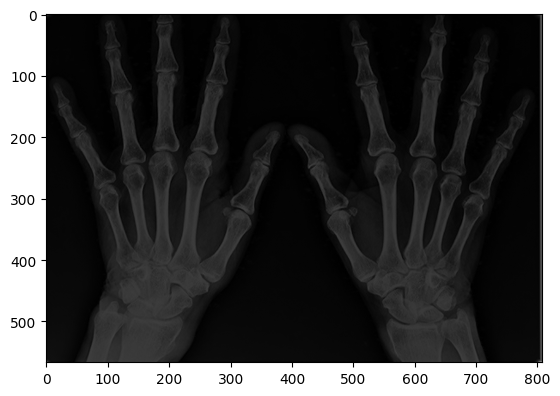

In [18]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
from scipy import fftpack

# open a grayscale image
img = Image.open('X.png').convert('L')

# convert image into an ndarray
im1 = np.asarray(img)

# performing FFT
c = np.abs(fftpack.fft2(im1))

# shifting the Fourier frequency image
d = fftpack.fftshift(c)

# initializing variables for convolution function
M = d.shape[0]
N = d.shape[1]

# H is defined and values in H are initialized to 1
H = np.ones((M, N))

center1 = M / 2
center2 = N / 2
d_0 = 30.0  # cut-off radius
tl = 1      # the order of BLPF
t2 = 2 * tl # used in formula

# defining the convolution function for BLPF
for i in range(M):
    for j in range(N):
        r1 = (i - center1)**2 + (j - center2)**2
        r = math.sqrt(r1)
        if r > 0:
            H[i, j] = 1 / (1 + (r / d_0)**t2)

# performing the convolution (in frequency domain)
con = fftpack.fft2(im1) * H

# computing the magnitude of the inverse FFT
e = np.abs(fftpack.ifft2(con))

# normalize and convert to uint8 for display
e = (e / np.max(e)) * 255
e = e.astype(np.uint8)

# converting to image
im3 = Image.fromarray(e)

# show results
img.show()
im3.show()
plt.imshow(im3, cmap='gray')
plt.show()
